In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
x = pd.read_csv("indep_x.csv", index_col = 0)
y = pd.read_csv("dep_y.csv", index_col = 0)

In [7]:
x.shape

(153, 11)

In [8]:
(x["treated"].sum(), round(x["treated"].sum()/x.shape[0],3))

(76, 0.497)

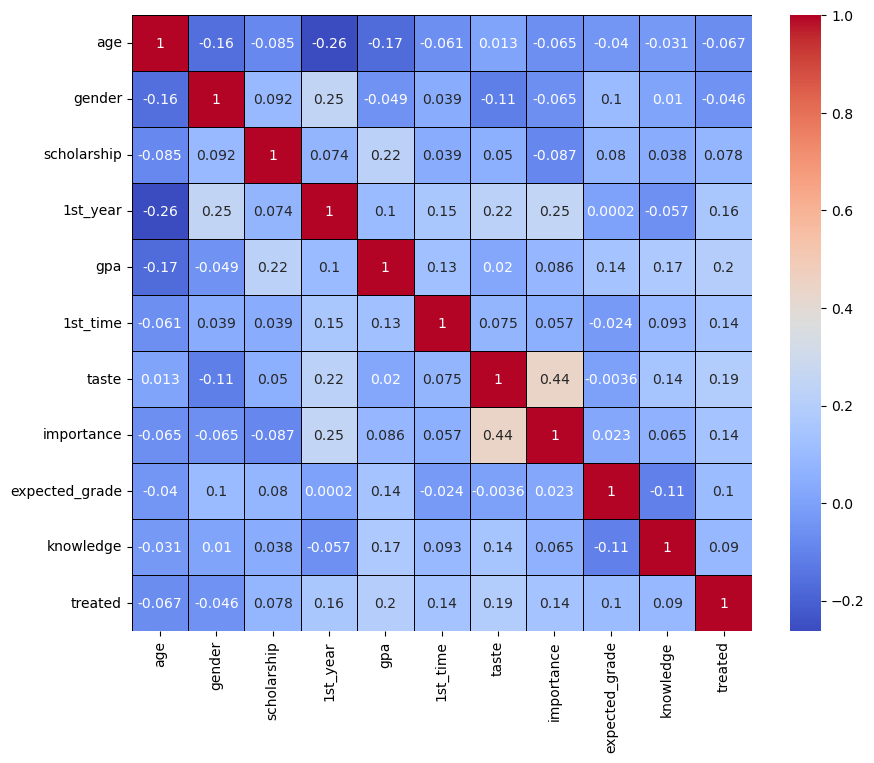

In [9]:
plt.figure(figsize=(10, 8))
correlation_matrix = x.corr() # even here, we fix for the GPA issue, by excluding people who don't have a GPA
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='black');

It seems that the only variables with a "high" level of correlation are in practice `taste` and `importance`.

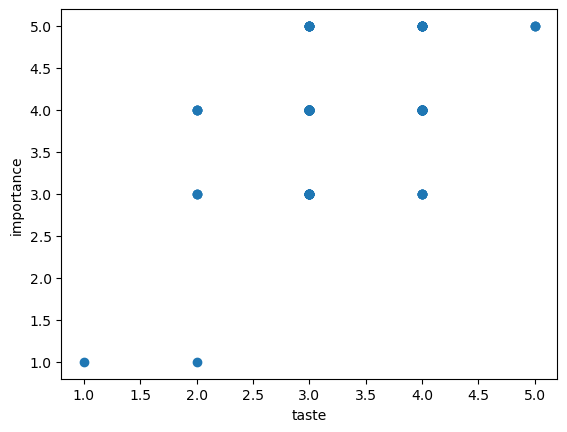

In [10]:
plt.scatter(x = x["taste"], y = x["importance"]);
plt.xlabel("taste");
plt.ylabel("importance");

In [11]:
all_vars = pd.concat([y,x], axis = 1)

<Axes: >

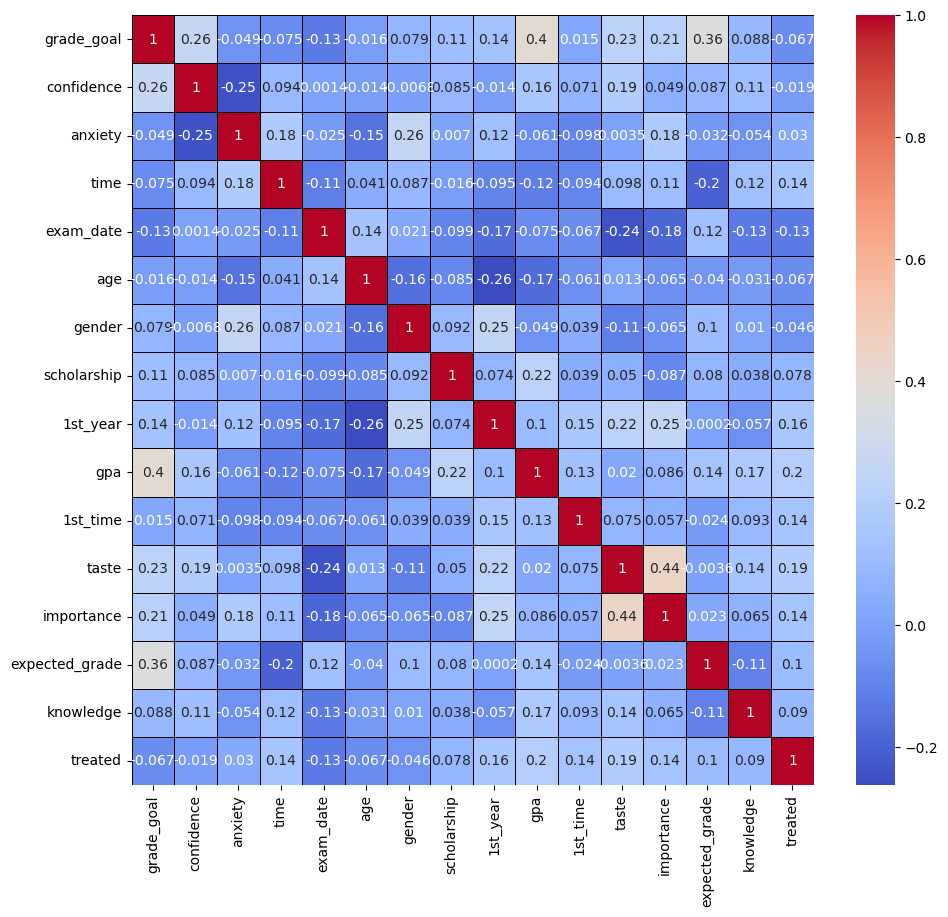

In [12]:
plt.figure(figsize=(11, 10))
all_vars_corr = all_vars.corr()
sns.heatmap(all_vars_corr, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='black')

Here we can also see another interesting positive correlation between `expected_grade` and `grade_goal`. Evidently, people who expect a prior a higher average grade in the exam, will set a higher grade goal for themselves. There is also an importance correlation between people with a higher `gpa`, and higher `grade_goal`.
We also see that people with a higher  `grade_goal` tend to have more  `confidence`.

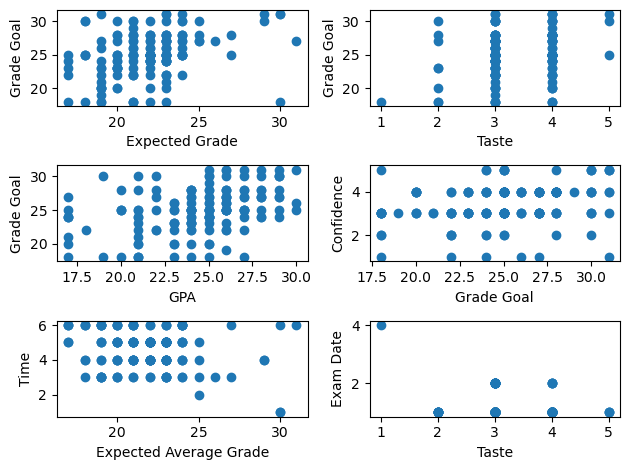

In [22]:
plt.subplots(nrows= 3, ncols= 2)

plt.subplot(3,2,1)
plt.scatter(x = all_vars["expected_grade"], y = all_vars["grade_goal"]);
plt.xlabel("Expected Grade");
plt.ylabel("Grade Goal");

plt.subplot(3,2,2)
plt.scatter(x = all_vars["taste"], y = all_vars["grade_goal"]);
plt.xlabel("Taste");
plt.ylabel("Grade Goal");

plt.tight_layout();

plt.subplot(3,2,3)
plt.scatter(x = all_vars["gpa"], y = all_vars["grade_goal"]);
plt.xlabel("GPA");
plt.ylabel("Grade Goal");

plt.subplot(3,2,4)
plt.scatter(x = all_vars["grade_goal"], y = all_vars["confidence"]);
plt.xlabel("Grade Goal");
plt.ylabel("Confidence");

plt.subplot(3,2,5);
plt.scatter(x = all_vars["expected_grade"], y = all_vars["time"]);
plt.xlabel("Expected Average Grade");
plt.ylabel("Time");

plt.subplot(3,2,6);
plt.scatter(x = all_vars["taste"], y = all_vars["exam_date"]);
plt.xlabel("Taste");
plt.ylabel("Exam Date");

plt.tight_layout();

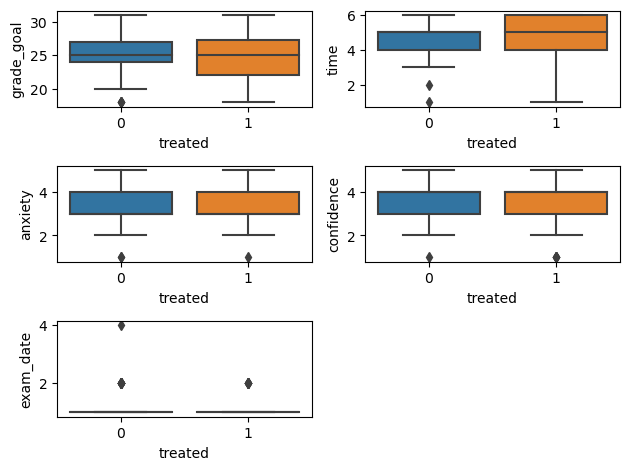

In [26]:
plt.subplot(3, 2, 1)
sns.boxplot(x="treated", y="grade_goal", data=all_vars)

plt.subplot(3, 2, 2)
sns.boxplot(x="treated", y="time", data=all_vars)

plt.subplot(3, 2, 3)
sns.boxplot(x="treated", y="anxiety", data=all_vars)

plt.subplot(3, 2, 4)
sns.boxplot(x="treated", y="confidence", data=all_vars)

plt.subplot(3, 2, 5)
sns.boxplot(x="treated", y="exam_date", data=all_vars)

plt.tight_layout()
plt.show()
